# Sample Code to Extract Features of VGG16

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from utils.utils import FeatureExtractor

import torch
from torchvision import models as models
from torchvision import transforms as transforms
from PIL import Image

In [3]:
output_dir = Path('015_Sample-Feature-Extraction-VGG16-PyTorch')
output_dir.mkdir(exist_ok=True)

## Load Pretrained VGG16 model

In [4]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
layer = model.features[3]
feature_extractor = FeatureExtractor(model, layer)

## Load Input Image

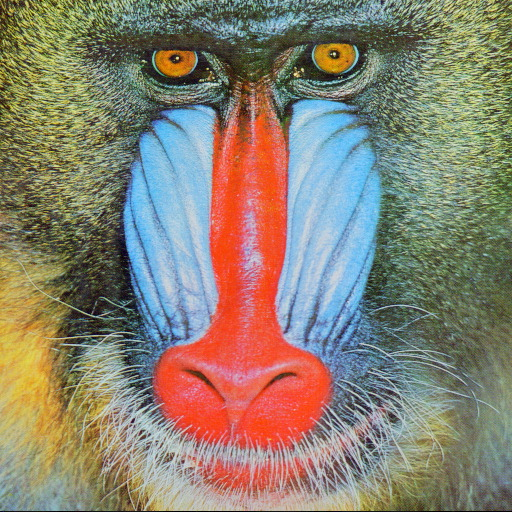

In [6]:
input_file = Path('/tmp/baboon.jpg')
if (not input_file.exists()):
    #!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/apple.jpg -P /tmp/
    !wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/baboon.jpg -P /tmp/
input_image = Image.open(input_file)
input_image

## Inference

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [8]:
input_tensor = preprocess(input_image)
input_tensor = input_tensor[None]
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [9]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
output_tensor = model(input_tensor)

In [11]:
idx = torch.argmax(output_tensor[0])
idx

tensor(372)

In [12]:
imagenet_classes = Path('/tmp/imagenet_classes.txt')
if (not imagenet_classes.exists()):
    !wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -P /tmp/
with open(imagenet_classes, 'r') as f:
    imagenet_class_list = f.read().splitlines()

imagenet_class_list

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [13]:
output_label = imagenet_class_list[idx]
output_label

'baboon'

## Extract Features

In [14]:
features = feature_extractor(input_tensor)
feature = features[0][0].detach().numpy()
feature.shape

(64, 224, 224)

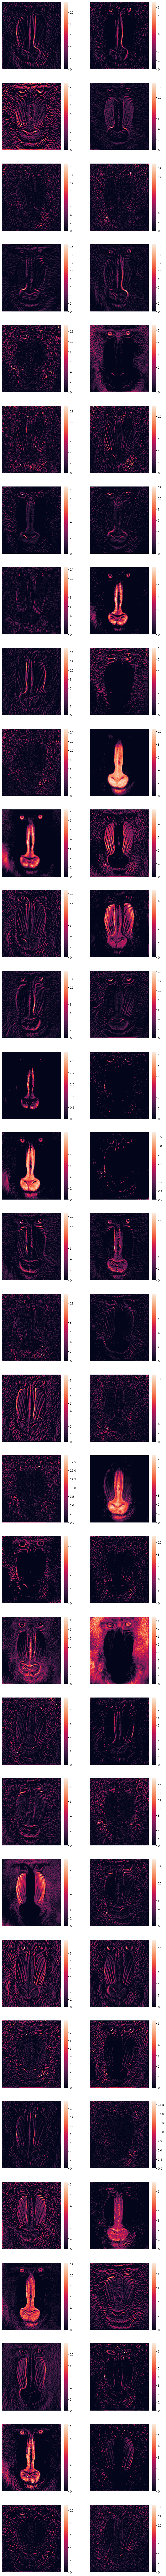

In [15]:
grid_size = 5
col = 2
row = len(feature) // col + len(feature) % col
fig, axes = plt.subplots(row, col, figsize=(grid_size*col, grid_size*row))
axes = axes.ravel()

for feature_, axes_ in zip(feature, axes):
    sns.heatmap(feature_, ax=axes_)
    axes_.axis('off')

plt.show()
plt.close()